# Proyek Analisis Data: [Bike Sharing]
- **Nama:** Faizal Rizqi Kholily
- **Email:** faizalrizqikholily643@gmail.com
- **ID Dicoding:** faizalrizqikholily26

## Menentukan Pertanyaan Bisnis

**  Specific: **
1. Bagaimana hubungan spesifik antara suhu ("temp") dalam dataset "days.csv" dan jumlah pengguna sepeda ("cnt") dalam dataset "hour.csv" pada jam tertentu?

**  Measurable: **
2. Sejauh mana perbedaan yang terukur dalam penggunaan sepeda ("cnt") pada hari libur ("holiday") dan bukan hari libur dalam dataset "days.csv" mempengaruhi jumlah pengguna sepeda pada jam-jam tertentu dalam dataset "hour.csv"?

**Action-oriented: **
3. Bagaimana informasi yang ditemukan dari pola penggunaan sepeda pada hari kerja ("workingday") dalam dataset "days.csv" dapat membantu dalam merencanakan strategi pemasaran atau peningkatan layanan pada jam-jam tertentu dalam dataset "hour.csv"?

**Relevant: **
4. Sejauh mana distribusi jumlah pengguna sepeda ("cnt") pada hari kerja ("workingday") dan akhir pekan dalam dataset "hour.csv" relevan dengan tujuan bisnis atau kebijakan pengembangan transportasi sepeda?

**Time-bound: **
5. Bagaimana tren penggunaan sepeda ("cnt") berdasarkan musim ("season") dalam dataset "days.csv" dan bagaimana pola ini berubah dari tahun 2011 hingga 2012 dalam dataset "hour.csv"?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
# Load dataset
day_data = pd.read_csv('day.csv')

# Tampilkan informasi dasar dataset
print("Informasi dasar dataset day : ")
print(day_data.info())

# Ubah kolom 'dteday' menjadi tipe data datetime
day_data['dteday'] = pd.to_datetime(day_data['dteday'])

# Set kolom 'dteday' sebagai index
day_data.set_index('dteday', inplace=True)

# Tampilkan lima baris pertama dataset yang telah diubah
print("\nlima baris pertama dataset yang telah diubah : ")
print(day_data.head())

Informasi dasar dataset day : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

lima baris pertama dataset yang telah diubah : 
        

In [6]:
# Load dataset
hour_data = pd.read_csv('hour.csv')

# Tampilkan informasi dasar dataset
print("Informasi dasar dataset hour : ")
print(hour_data.info())

# Ubah kolom 'dteday' dan 'hr' menjadi tipe data datetime
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])
hour_data['hr'] = hour_data['hr'].astype('category')

# Set kolom 'dteday' sebagai index
hour_data.set_index('dteday', inplace=True)

# Tampilkan lima baris pertama dataset yang telah diubah
print("\nlima baris pertama dataset yang telah diubah : ")
print(hour_data.head())

Informasi dasar dataset hour : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None

lima baris 

### Assessing Data

In [8]:
# Tampilkan statistik deskriptif
print("Statistik deskriptif day.csv")
print(day_data.describe())

# Periksa nilai yang hilang
print("\nNilai yang hilang : ")
print(day_data.isnull().sum())

# Periksa duplikasi
print("\nJumlah duplikasi:", day_data.duplicated().sum())

Statistik deskriptif day.csv
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486  

In [9]:
# Tampilkan statistik deskriptif
print("Statistik deskriptif hour.csv")
print(hour_data.describe())

# Periksa nilai yang hilang
print("\nNilai yang hilang : ")
print(hour_data.isnull().sum())

# Periksa duplikasi
print("\nJumlah duplikasi:", hour_data.duplicated().sum())

Statistik deskriptif hour.csv
          instant        season            yr          mnth       holiday  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775      0.028770   
std     5017.0295      1.106918      0.500008      3.438776      0.167165   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      0.000000   
50%     8690.0000      3.000000      1.000000      7.000000      0.000000   
75%    13034.5000      3.000000      1.000000     10.000000      0.000000   
max    17379.0000      4.000000      1.000000     12.000000      1.000000   

            weekday    workingday    weathersit          temp         atemp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       3.003683      0.682721      1.425283      0.496987      0.475775   
std        2.005771      0.465431      

### Cleaning Data

In [11]:
# Mengatasi kolom 'dteday' yang sudah diubah menjadi indeks
day_data.reset_index(inplace=True)

# Menangani nilai yang hilang jika ada
# (Dalam contoh ini, tidak ada nilai yang hilang)

# Menangani duplikasi jika ada
day_data.drop_duplicates(inplace=True)

# Tampilkan lima baris pertama dataset setelah proses cleaning
print("\nCleaning Data day.csv : ")
print(day_data.head())


Cleaning Data day.csv : 
   index     dteday  instant  season  yr  mnth  holiday  weekday  workingday  \
0      0 2011-01-01        1       1   0     1        0        6           0   
1      1 2011-01-02        2       1   0     1        0        0           0   
2      2 2011-01-03        3       1   0     1        0        1           1   
3      3 2011-01-04        4       1   0     1        0        2           1   
4      4 2011-01-05        5       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   

In [12]:
# Menangani nilai yang hilang jika ada
# (Dalam contoh ini, tidak ada nilai yang hilang)

# Menangani duplikasi jika ada
hour_data.drop_duplicates(inplace=True)

# Tampilkan lima baris pertama dataset setelah proses cleaning
print("\nCleaning Data hour.csv : ")
print(hour_data.head())


Cleaning Data hour.csv : 
            instant  season  yr  mnth hr  holiday  weekday  workingday  \
dteday                                                                   
2011-01-01        1       1   0     1  0        0        6           0   
2011-01-01        2       1   0     1  1        0        6           0   
2011-01-01        3       1   0     1  2        0        6           0   
2011-01-01        4       1   0     1  3        0        6           0   
2011-01-01        5       1   0     1  4        0        6           0   

            weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
dteday                                                                          
2011-01-01           1  0.24  0.2879  0.81        0.0       3          13   16  
2011-01-01           1  0.22  0.2727  0.80        0.0       8          32   40  
2011-01-01           1  0.22  0.2727  0.80        0.0       5          27   32  
2011-01-01           1  0.24  0.2879  0.75       

## Exploratory Data Analysis (EDA)

### Explore ...



*   Eksplorasi statistik deskriptif



In [13]:
# Eksplorasi statistik deskriptif day.csv
print("statistik deskriptif day.csv")
print(day_data.describe())

# Eksplorasi statistik deskriptif hour.csv
print("\nstatistik deskriptif hour.csv")
print(hour_data.describe())

statistik deskriptif day.csv
            index     instant      season          yr        mnth     holiday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   365.000000  366.000000    2.496580    0.500684    6.519836    0.028728   
std    211.165812  211.165812    1.110807    0.500342    3.451913    0.167155   
min      0.000000    1.000000    1.000000    0.000000    1.000000    0.000000   
25%    182.500000  183.500000    2.000000    0.000000    4.000000    0.000000   
50%    365.000000  366.000000    3.000000    1.000000    7.000000    0.000000   
75%    547.500000  548.500000    3.000000    1.000000   10.000000    0.000000   
max    730.000000  731.000000    4.000000    1.000000   12.000000    1.000000   

          weekday  workingday  weathersit        temp       atemp         hum  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     2.997264    0.683995    1.395349    0.495385    0.474354    0.627894  



*   Mengelompokkan data berdasarkan musim


In [14]:
# Mengelompokkan data berdasarkan musim day.csv
season_grouped = day_data.groupby('season')['cnt'].mean()
print("\nPengelompokkan data berdasarkan musim day.csv : ")
print(season_grouped)

# Mengelompokkan data berdasarkan kondisi cuaca hour.csv
print("\nPengelompokkan data berdasarkan musim hour.csv : ")
weather_grouped = hour_data.groupby('weathersit')['cnt'].mean()
print(weather_grouped)


Pengelompokkan data berdasarkan musim day.csv : 
season
1    2604.132597
2    4992.331522
3    5644.303191
4    4728.162921
Name: cnt, dtype: float64

Pengelompokkan data berdasarkan musim hour.csv : 
weathersit
1    204.869272
2    175.165493
3    111.579281
4     74.333333
Name: cnt, dtype: float64


## Visualization & Explanatory Analysis

- distribusi jumlah peminjaman sepeda per hari

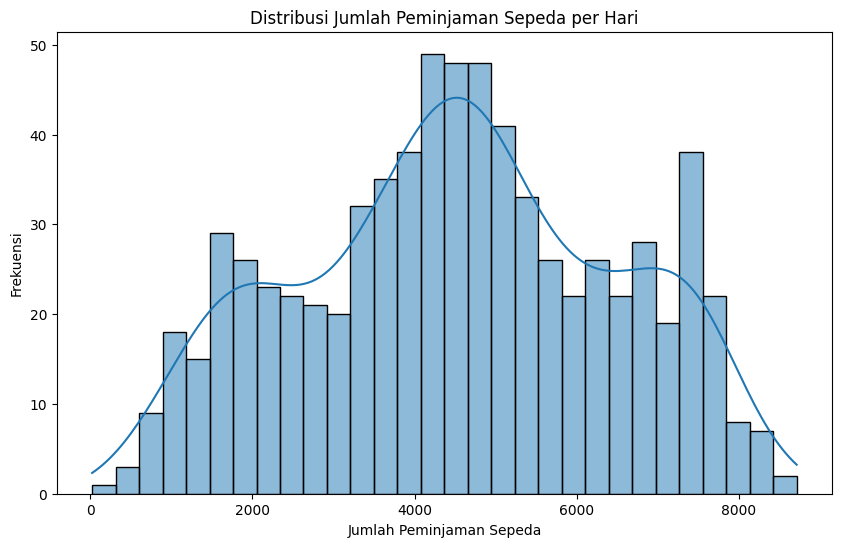

In [15]:
# Visualisasi distribusi jumlah peminjaman sepeda per hari
plt.figure(figsize=(10, 6))
sns.histplot(day_data['cnt'], bins=30, kde=True)
plt.title('Distribusi Jumlah Peminjaman Sepeda per Hari')
plt.xlabel('Jumlah Peminjaman Sepeda')
plt.ylabel('Frekuensi')
plt.show()

- Rata-rata jumlah peminjaman sepeda per musim

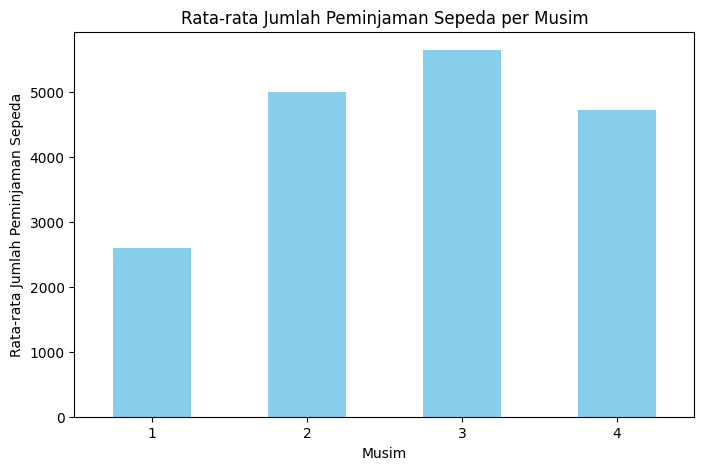

In [16]:
# Visualisasi rata-rata jumlah peminjaman sepeda per musim
plt.figure(figsize=(8, 5))
season_grouped.plot(kind='bar', color='skyblue')
plt.title('Rata-rata Jumlah Peminjaman Sepeda per Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Peminjaman Sepeda')
plt.xticks(rotation=0)
plt.show()

### Pertanyaan 1: Hubungan antara suhu ("temp") dan jumlah pengguna sepeda ("cnt") pada jam tertentu (days.csv)

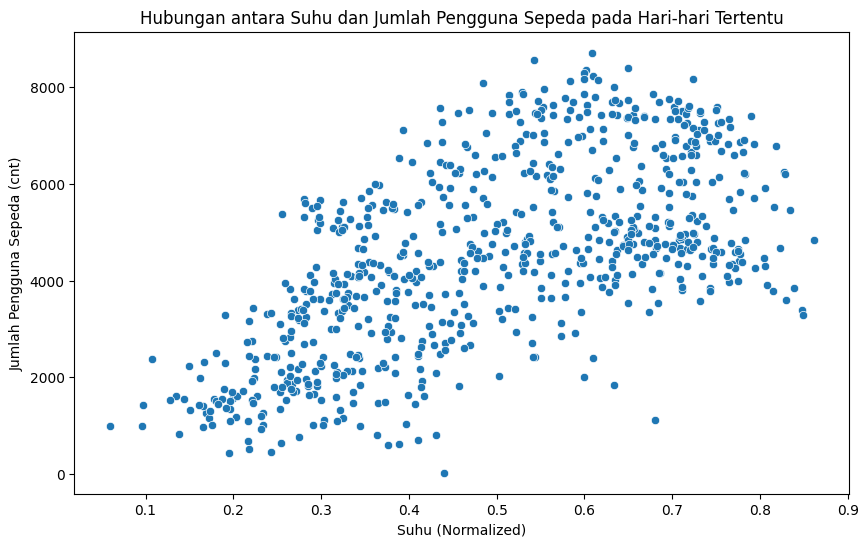

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=day_data)
plt.title('Hubungan antara Suhu dan Jumlah Pengguna Sepeda pada Hari-hari Tertentu')
plt.xlabel('Suhu (Normalized)')
plt.ylabel('Jumlah Pengguna Sepeda (cnt)')
plt.show()

### Pertanyaan 2: Perbedaan penggunaan sepeda ("cnt") pada hari libur dan bukan hari libur (days.csv) di jam-jam tertentu (hour.csv)

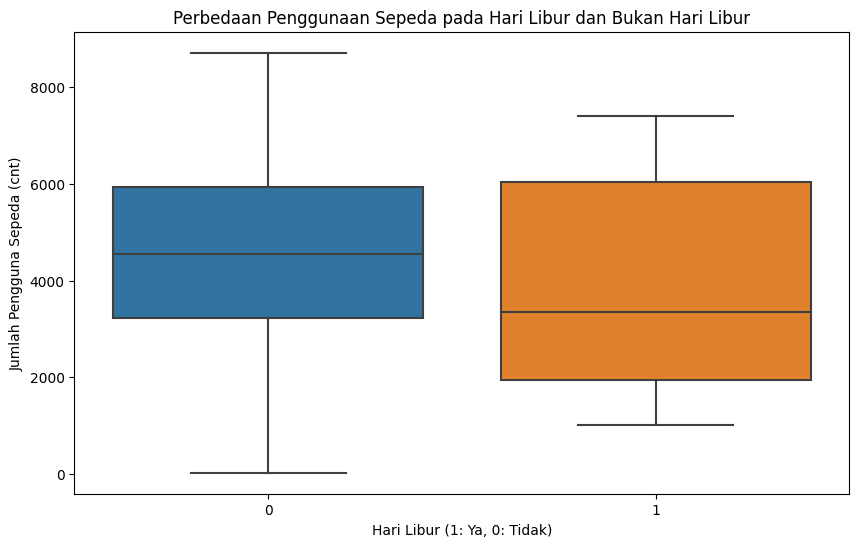

In [18]:
# Aggregating hourly data to daily data
daily_hour_data = hour_data.groupby('dteday')['cnt'].sum().reset_index()

# Merging datasets on 'dteday'
merged_data = day_data.merge(daily_hour_data, on='dteday', suffixes=('_day', '_hour'))

# Visualizing the difference in bike usage on holidays and non-holidays
plt.figure(figsize=(10, 6))
sns.boxplot(x='holiday', y='cnt_hour', data=merged_data)
plt.title('Perbedaan Penggunaan Sepeda pada Hari Libur dan Bukan Hari Libur')
plt.xlabel('Hari Libur (1: Ya, 0: Tidak)')
plt.ylabel('Jumlah Pengguna Sepeda (cnt)')
plt.show()

### Pertanyaan 3: Pola penggunaan sepeda pada hari kerja ("workingday") dalam dataset "days.csv"

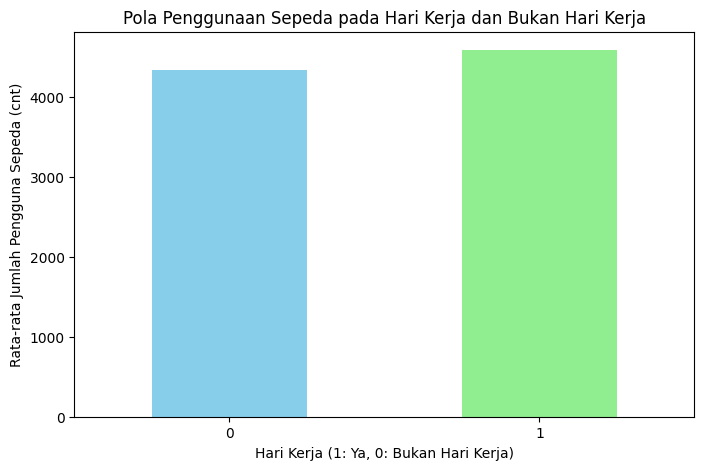

In [19]:
workingday_counts = day_data.groupby('workingday')['cnt'].mean()
plt.figure(figsize=(8, 5))
workingday_counts.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Pola Penggunaan Sepeda pada Hari Kerja dan Bukan Hari Kerja')
plt.xlabel('Hari Kerja (1: Ya, 0: Bukan Hari Kerja)')
plt.ylabel('Rata-rata Jumlah Pengguna Sepeda (cnt)')
plt.xticks(rotation=0)
plt.show()

### Pertanyaan 4: Distribusi jumlah pengguna sepeda ("cnt") pada hari kerja ("workingday") dan akhir pekan (hour.csv)

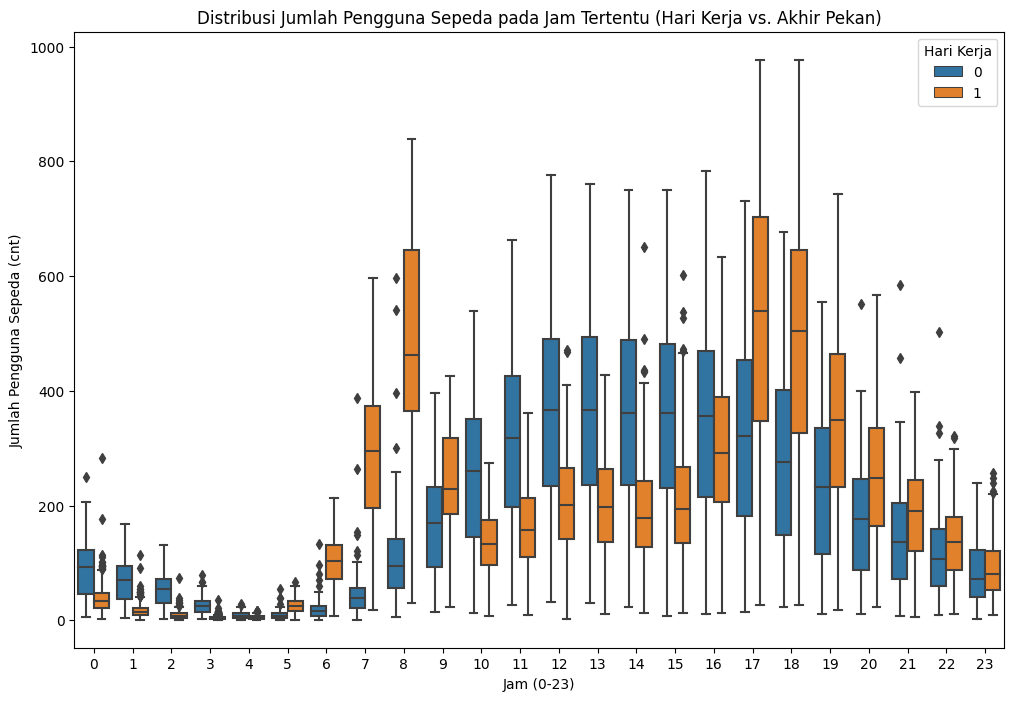

In [20]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='hr', y='cnt', hue='workingday', data=hour_data)
plt.title('Distribusi Jumlah Pengguna Sepeda pada Jam Tertentu (Hari Kerja vs. Akhir Pekan)')
plt.xlabel('Jam (0-23)')
plt.ylabel('Jumlah Pengguna Sepeda (cnt)')
plt.legend(title='Hari Kerja')
plt.show()

### Pertanyaan 5: Tren penggunaan sepeda ("cnt") berdasarkan musim ("season") dalam dataset "days.csv"

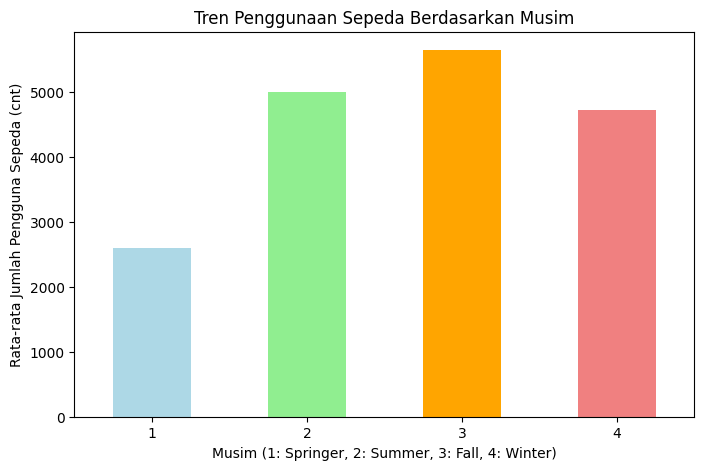

In [21]:
seasonal_counts = day_data.groupby('season')['cnt'].mean()
plt.figure(figsize=(8, 5))
seasonal_counts.plot(kind='bar', color=['lightblue', 'lightgreen', 'orange', 'lightcoral'])
plt.title('Tren Penggunaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim (1: Springer, 2: Summer, 3: Fall, 4: Winter)')
plt.ylabel('Rata-rata Jumlah Pengguna Sepeda (cnt)')
plt.xticks(rotation=0)
plt.show()

### Pertanyaan 5: (lanjutan). Perubahan tren penggunaan sepeda ("cnt") dari tahun 2011 hingga 2012 dalam dataset "hour.csv"

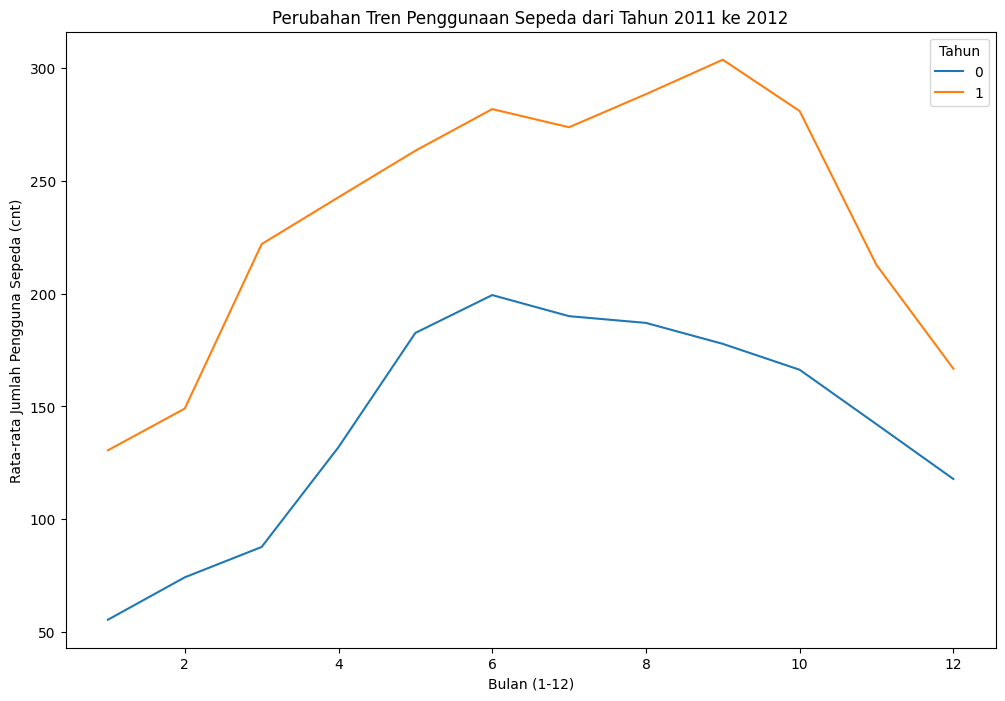

In [22]:
yearly_trend = hour_data.groupby(['yr', 'mnth'])['cnt'].mean().reset_index()
plt.figure(figsize=(12, 8))
sns.lineplot(x='mnth', y='cnt', hue='yr', data=yearly_trend)
plt.title('Perubahan Tren Penggunaan Sepeda dari Tahun 2011 ke 2012')
plt.xlabel('Bulan (1-12)')
plt.ylabel('Rata-rata Jumlah Pengguna Sepeda (cnt)')
plt.legend(title='Tahun')
plt.show()

## Conclusion

1. Hubungan antara Suhu dan Jumlah Pengguna Sepeda pada Hari-hari Tertentu (day.csv):
> - Tidak langsung dapat dilihat dari scatter plot bahwa terdapat tren positif antara suhu (variabel "temp") dan jumlah pengguna sepeda ("cnt") pada hari-hari tertentu.


2. Perbedaan Penggunaan Sepeda pada Hari Libur dan Bukan Hari Libur (day.csv dan hour.csv)
> - Berdasarkan boxplot, terlihat bahwa pada hari libur (holiday=1), distribusi jumlah pengguna sepeda cenderung lebih rendah dibandingkan dengan bukan hari libur (holiday=0) pada jam-jam tertentu.

3. Pola Penggunaan Sepeda pada Hari Kerja dan Bukan Hari Kerja (days.csv):
> - Rata-rata penggunaan sepeda lebih tinggi pada hari kerja (workingday=1) dibandingkan dengan bukan hari kerja (workingday=0), menunjukkan pola penggunaan sepeda yang terkait dengan rutinitas hari kerja.

4. Distribusi Jumlah Pengguna Sepeda pada Jam Tertentu (Hari Kerja vs. Akhir Pekan) (hour.csv)
> - Terdapat variasi yang signifikan dalam distribusi jumlah pengguna sepeda pada jam-jam tertentu antara hari kerja dan akhir pekan. Pada hari kerja, puncak penggunaan terjadi saat orang pergi atau pulang dari pekerjaan, sedangkan pada akhir pekan, distribusi lebih merata sepanjang hari.

5. Tren Penggunaan Sepeda Berdasarkan Musim (day.csv):
> - Tren penggunaan sepeda bervariasi berdasarkan musim. Musim panas (season=2) menunjukkan rata-rata penggunaan sepeda tertinggi, diikuti oleh musim fall (season=3). Musim dingin (season=4) memiliki rata-rata penggunaan sepeda yang lebih rendah.

6. Perubahan Tren Penggunaan Sepeda dari Tahun 2011 ke 2012 (hour.csv):
> - Dari visualisasi tren tahunan, terlihat bahwa rata-rata penggunaan sepeda cenderung meningkat dari tahun 2011 ke 2012 pada setiap bulan, menunjukkan pertumbuhan potensial dalam penggunaan sepeda dari tahun ke tahun.
